## Bank Loan Status Prediction

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

from sklearn.svm import SVC

In [32]:
df = pd.read_csv(r'D:\ML\Machine_Learning\ML_files\Data sets\tips\loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [33]:
df.shape

(381, 13)

## Data Cleaning

In [34]:
# check for null values
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
# removing null values
df = df.dropna()

In [36]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
# check for duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
376    False
377    False
378    False
379    False
380    False
Length: 308, dtype: bool

In [38]:
# check columns type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    object 
 2   Married            308 non-null    object 
 3   Dependents         308 non-null    object 
 4   Education          308 non-null    object 
 5   Self_Employed      308 non-null    object 
 6   ApplicantIncome    308 non-null    int64  
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    float64
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    float64
 11  Property_Area      308 non-null    object 
 12  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 33.7+ KB


In [39]:
# removing unnecessary
df.drop(columns=['Loan_ID','Dependents'],axis=1,inplace=True)

In [40]:
# checking statistics of the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,308.000000,308.000000,308.000000,308.000000,308.000000
mean,3599.126623,1278.434805,104.623377,341.181818,0.853896
std,1462.359612,2520.961308,29.382256,68.246006,0.353785
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2568.750000,0.000000,89.750000,360.000000,1.000000
50%,3329.500000,871.500000,110.000000,360.000000,1.000000
75%,4291.000000,1953.500000,128.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [41]:
# checking for education columns values
df['Education'].value_counts()

Education
Graduate        229
Not Graduate     79
Name: count, dtype: int64

In [42]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    123
Urban         99
Rural         86
Name: count, dtype: int64

## Data Visualization

In [43]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


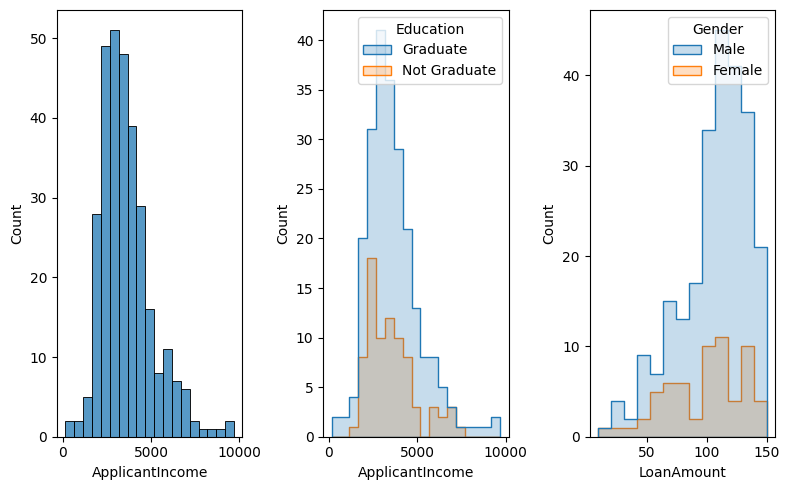

In [44]:
# using histogram
fig,ax = plt.subplots(1,3, figsize=(8,5))
sns.histplot(data=df,x='ApplicantIncome',ax=ax[0])
sns.histplot(data=df,x='ApplicantIncome',hue='Education',ax=ax[1],element='step')
sns.histplot(data=df,x='LoanAmount',hue='Gender',ax=ax[2],element='step')

plt.tight_layout()
plt.show()

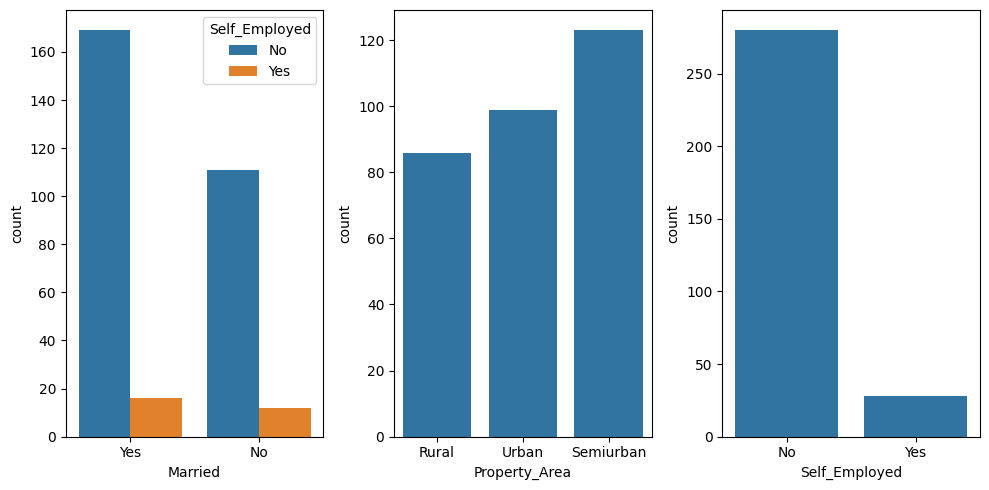

In [45]:
# using count plot
fig,ax = plt.subplots(1,3,figsize=(10,5))
sns.countplot(data=df,x='Married',hue='Self_Employed',ax=ax[0])
sns.countplot(data=df,x='Property_Area',ax=ax[1])
sns.countplot(data=df,x='Self_Employed',ax=ax[2])
plt.tight_layout()
plt.show()

## Data Preprocessing

In [46]:
encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])

df['Married'] = encoder.fit_transform(df['Married'])

df['Education'] = encoder.fit_transform(df['Education'])

df['Self_Employed'] = encoder.fit_transform(df['Self_Employed'])

df['Property_Area'] = encoder.fit_transform(df['Property_Area'])

df['Loan_Status'] = encoder.fit_transform(df['Loan_Status'])

## Model Building

In [221]:
X = df.drop(columns='Loan_Status')
y = df['Loan_Status']

In [222]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [223]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [226]:
# applying Support vector machine
svm = SVC(kernel='poly')
svm.fit(X_train_scaled,y_train)
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)

In [231]:
print(f"Support Vector machine Accuracy: {accuracy}")
print(classification_report(y_test,y_pred))

Support Vector machine Accuracy: 0.8387096774193549
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        20
           1       0.83      0.95      0.89        42

    accuracy                           0.84        62
   macro avg       0.85      0.78      0.80        62
weighted avg       0.84      0.84      0.83        62

